In [40]:
import matplotlib.pyplot as plt
import matplo
#%matplotlib inline
plt.set('Agg')

AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

In [2]:
import numpy as np
import healpy as hp

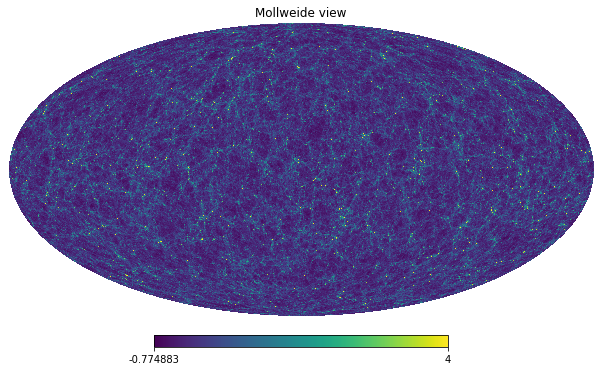

In [3]:
o = hp.read_map("overdensity.fits")
hp.mollview(o,xsize=6400, max=4)

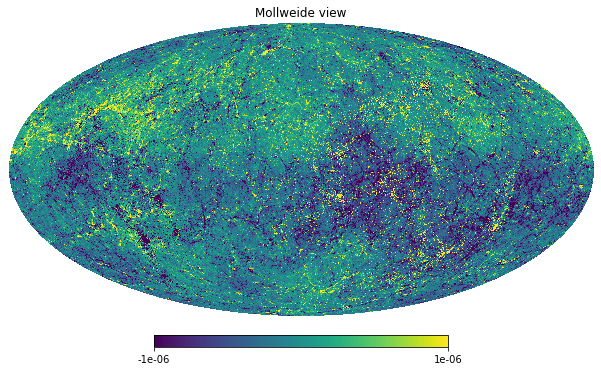

In [15]:
kSZ = hp.read_map("kSZ.fits")
hp.mollview(kSZ,xsize=6400, min=-1*10**-6,max=1*10**-6)
plt.savefig("ksz")

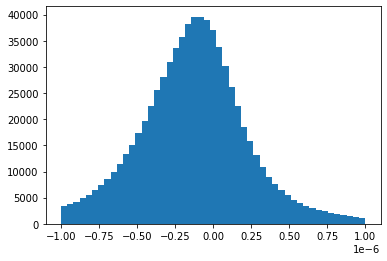

In [5]:
plt.hist(kSZ,bins = np.linspace(-1*10**-6,1*10**-6));

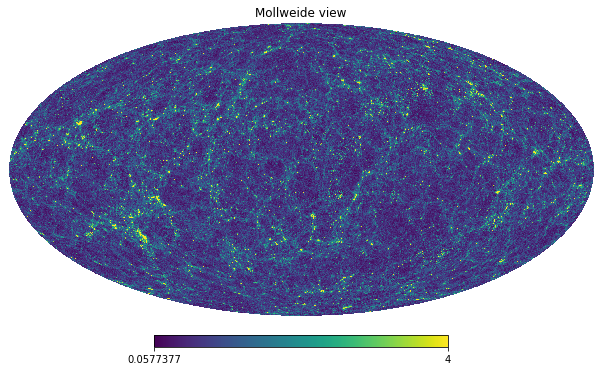

In [8]:
convergence = hp.read_map("convergence.fits")
hp.mollview(convergence,xsize=3200,max=4)

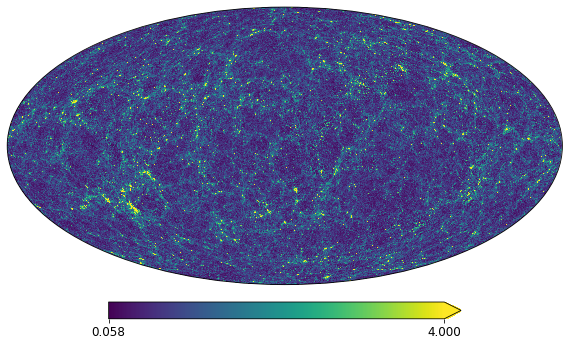

In [39]:
hp.newvisufunc.projview(convergence,max=4,xsize=3200);
plt.savefig('convergence')

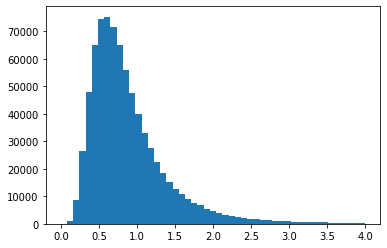

In [9]:
plt.hist(convergence,bins=np.linspace(0,4));

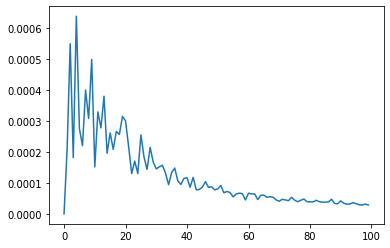

In [34]:
plt.plot(hp.sphtfunc.anafast(o)[0:100])